# Accessing the Quality of wine through Exploratory data analysis

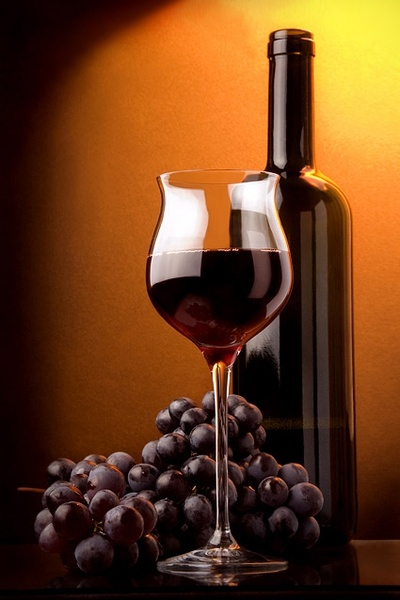

Disclaimer: The images are only for illustration purpose. Please don't compare them with the data.

# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Understanding the data information through .info()](#section302)<br>
4. [Pandas Profiling before Data Pre-processing](#section4)<br>
  - 4.1[Observations from Profile Report of Pandas Profiling](#section401)<br>
  - 4.2[Analizing the duplicate values](#section401)<br>
  - 4.3[Removing duplicates](#section403)<br>
  - 4.4[Fixing the indexes after removing the duplicates](#section404)<br>
5. [Pandas Profiling after Data Pre-processing](#section5)<br>
  - 5.1[Observation from Post Profiling](#section501)<br>
6. [Data Analysis](#section6)<br>
  - 6.1[Univariant analysis](#section601)<br>
  - 6.2[Observation from Univariant Analysis](#section602)<br>
  - 6.3[Bivariant Analysis](#section603)<br>
  - 6.4[Plotting Heat Map](#section604)<br>
  - 6.5[Quality V/S Alcohol](#section605)<br>
  - 6.6[Quality V/S Density](#section606)<br>
  - 6.7[Quality V/S Chlorides](#section607)<br>
  - 6.8[Quality V/S Volatile Acidity](#section608)<br>
  - 6.9[Density V/S Alcohol](#section609)<br>
7. [Conclusion / Summary](#section7)<br>

8. [Actionable Insights](#section8)<br>


<a id=section1></a>
## 1.Problem Definition

Traditionally the quality of the wine is determined only by **tasting** it and rating the **quality grade between 1-10**. 
So it is very difficult to assess the quality of **wine** just by reading the label. 

What if, we can produce **best quality wine** by precisely controlling its ingredients?

But as we have **dataset which contains different ingredient of wine** and also we have **Quality of Wine** column. So based on that, we will try to find out what should be level of various ingredients to **get the best quality of wine.**

We will also try to find out which are the **ingredients, that needs to be controlled to achieve highest quality?**


<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
from pandas_profiling import ProfileReport

In [3]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3.Loading the Data

We will be using the data from **INSAID** for our EDA

In [4]:
df_wine=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head() #importing data and displaying first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<a id=section301></a>
## 3.1 Description of the dataset

This dataset provides information about **wine's** ingredients like citric acid, chloride, sulfur dioxide, density, PH, alcohol etc.

| **Column Name** | | **Description** |
|-------------| |-------------|
|Fixed acidity|	|Most acids involved with wine or fixed or non-volatile (do not evaporate readily)(tartaric acid - g / dm^3)|
|Volatile acidity| |The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste(acetic acid - g / dm^3)|
|Citric acid|	|Found in small quantities, citric acid can add ‘freshness’ and flavour to wines (g / dm^3)|
|Residual sugar|	|The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/litre and wines with greater than 45 grams/litre are considered sweet  (g / dm^3)|
|Chlorides|	|The amount of salt in the wine (sodium chloride - g / dm^3)|
|Free sulphur dioxide|	|Free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfide ion. It prevents microbial growth and the oxidation of wine.(mg / dm^3)|
|Total sulphur dioxide|	|Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine (mg / dm^3)|
|Density|	|The density of water is close to that of water depending on the percent alcohol and sugar content (g / cm^3)|
|pH|	|Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.|
|Sulphates|	|A wine additive which can contribute to sulphur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant (potassium sulphate - g / dm3)|
|Alcohol|	|The percent alcohol content of the wine. (% by volume)|
|Quality|	|Score between 0 to 10|



<a id=section302></a>
## 3.2 Understanding the data information through ```.info()```

In [5]:
df_wine.info() # understanding the number of rows, columns and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Correcting the spelling of **sulphur**

In [6]:
df_wine=df_wine.rename(columns={'free sulfur dioxide':'free sulphur dioxide','total sulfur dioxide':'total sulphur dioxide'})

### From the above , ```.info()``` function, we understood the following;
- There are 11 columns with 10 columns having ```float``` datatype and balance one column having ```int``` datatype
- There are **6,497** rows of data
- The data seem to have no **missing values**

<a id=section303></a>
## 3.3 Describing the data using ```.describe()``` function 

In [7]:
df_wine.describe() #describe function to check if anything out of the box

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


####  From the above ```df_wine.describe()``` function we infer the following;
- **Citric Acid** column is having an almost normal distribution because the mean (0.318633) value is close to the median (0.310000) value.
- The **Density** column data is also normally distributed because of the mean (0.994697) is very close to its median (0.994890).
- We also notice that **pH** column is also normally distributed as the mean (3.218501) is very close to its median (3.210000).
- The mean sugar lever is 5.4 g/l. This is mainly because of the outlier of 65.8g/l in the data. 
- Mean free sulfur dioxide is 30.5 ppm. Max value is 289ppm which is quite high as 75% is 41 ppm. 

<a id=section4></a>
##  4. Pandas Profiling before Data Pre-processing

In [8]:
profile=ProfileReport(df_wine)
profile.to_file(output_file='wine_data_preprofiling.html') #generating the profiling report to check what needs to be cleaned

<a id=section401></a>
### 4.1 Observations from **Profile Report** of Pandas Profiling:
- **Citric acid** columns contains 151 (2.3%) zeros - <font color = blue> This can be ignored as the other values are very close to 0. If we delete these downs, we may loose lot of valuable data. </Font>
- **Dataset has 1179 (18.1%) duplicate rows** - <font color = blue>  We will analyse the duplicate rows and remove them.</Font>
- All the columns are numeric in Nature

<a id=section402></a>
### 4.2 Analysing the duplicate values

In [9]:
df_wine[df_wine.duplicated()] #to display all the duplicate values with their indexes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [10]:
df_wine[df_wine['fixed acidity']==7.5].iloc[:2]#comparing data to understand if it is really duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5
11,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5


In [11]:
df_wine[df_wine['fixed acidity']==7.4].iloc[:2] #comparing data to understand if it is really duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Inference**


As you can see above there are two entries of exact same values. They are having **duplicate** values in  the data which may bias the output. Therefore it is best to delete these duplicate rows

<a id=section403></a>

### 4.3 Removing duplicates

In [12]:
df_wine.drop_duplicates(inplace=True) #deleting duplicate rows

In [13]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<a id=section404></a>

## 4.4 Fixing the indexes after removing the duplicates

In [14]:
df_wine.reset_index(inplace=True) #resetting the index after deleting duplicate values

In [15]:
df_wine.drop('index',axis =1,inplace=True )# deleting index which came out automatically

In [16]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5313,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
5314,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
5315,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
5316,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


As you can see above, the index values are fixed

<a id=section5></a>
##  5. Pandas Profiling after Data Pre-processing

In [17]:
profile=ProfileReport(df_wine)
profile.to_file(output_file='Pandas_profiling_after_Data_Processing.html') #genetating profil report to study if the data is clean

<a id=section501></a>
### 5.1 Observation from Post Profiling;
From the Pandas Profile Report after post processing, we noticed that all the issues mentioned in pre profiling has been resolved and now the **wine data** is ready to cary out **Data Analysis**

<a id=section6></a>

## 6. Data Analysis



In this section we will explore the data in and out to understand its behaviour. First, we will analyse individual columns and then see how each column is related with wine quality

In [18]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [22]:
cols=['fixed acidity','volatile acidity','citric acid','residual sugar'
      ,'chlorides','free sulphur dioxide','total sulphur dioxide','density',
      'pH','sulphates','alcohol','quality'] # extracting all the columns into a list

In [23]:
df_wine.describe() # trying to find out the data behaviour after cleaning

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<a id=section601></a>
### 6.1. Univariant analysis

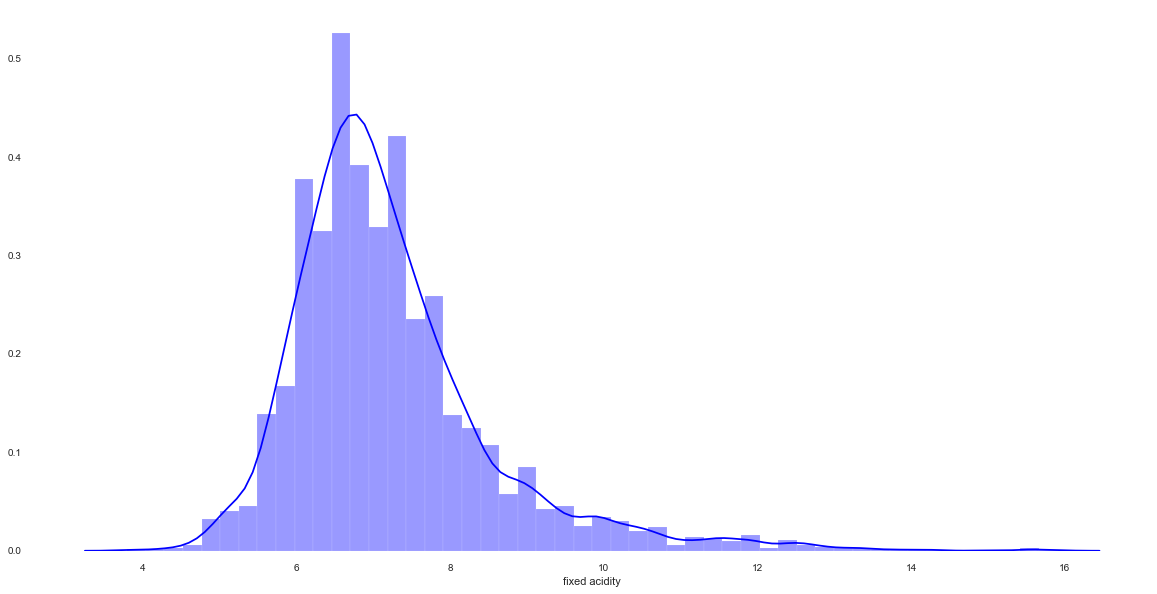

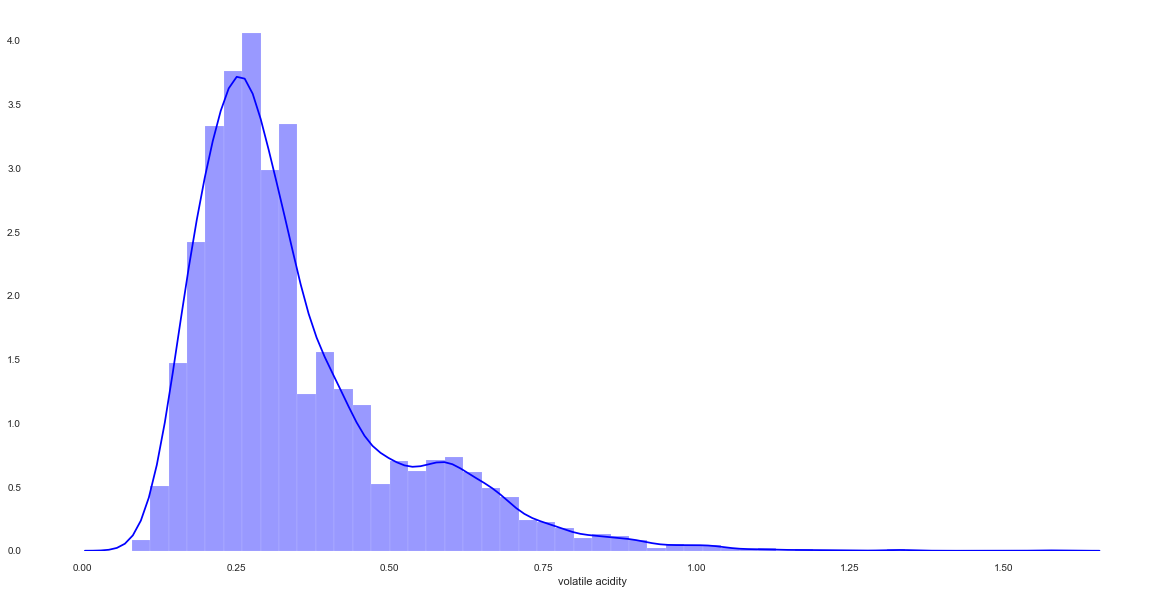

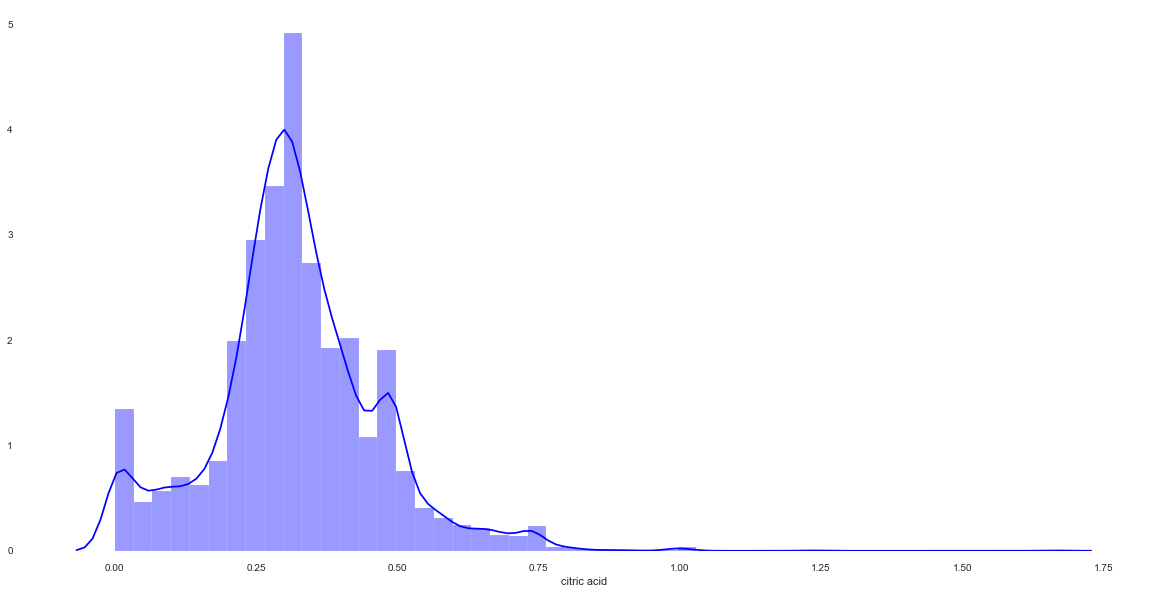

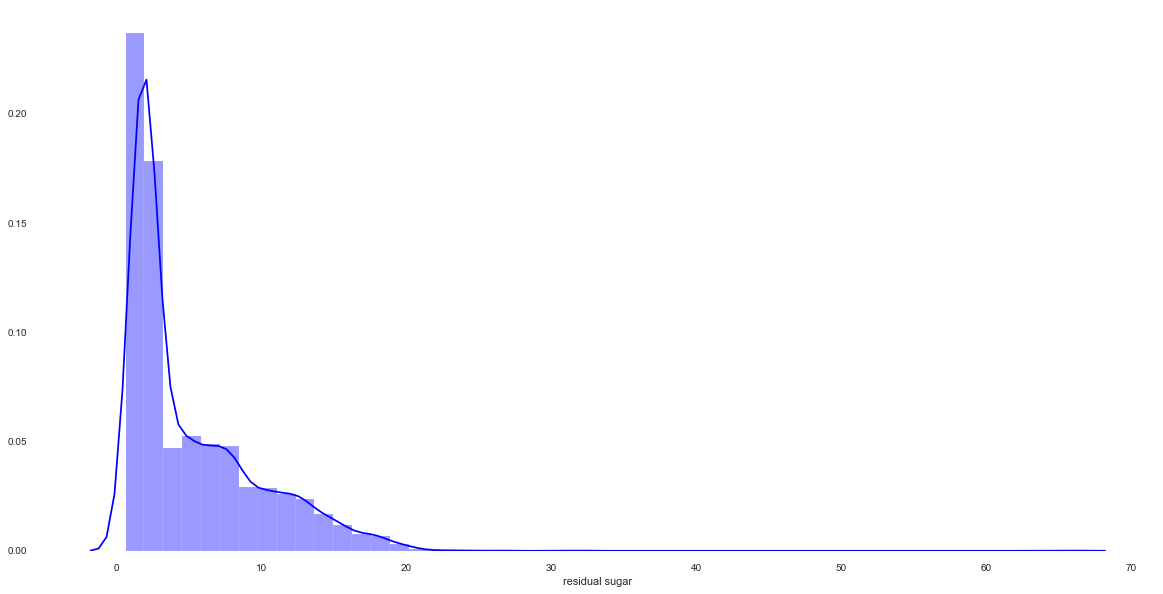

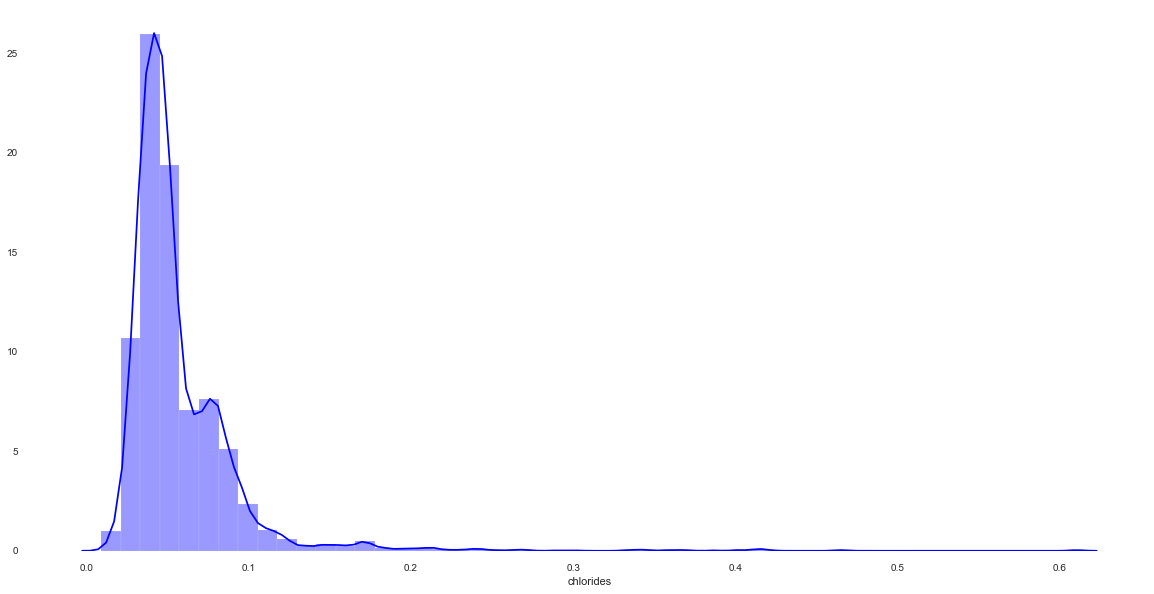

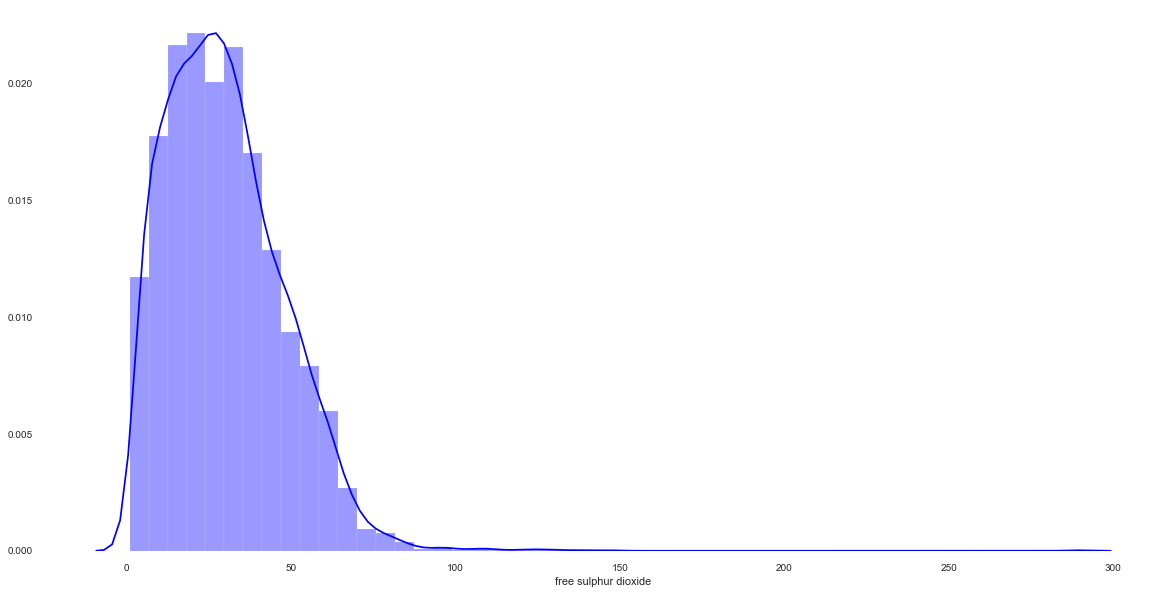

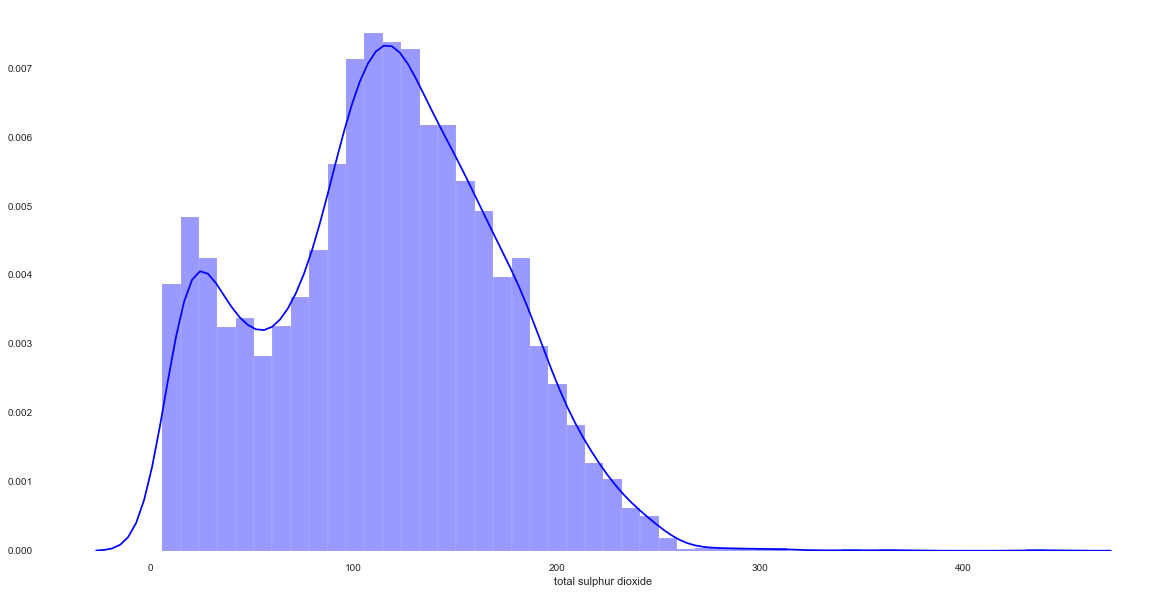

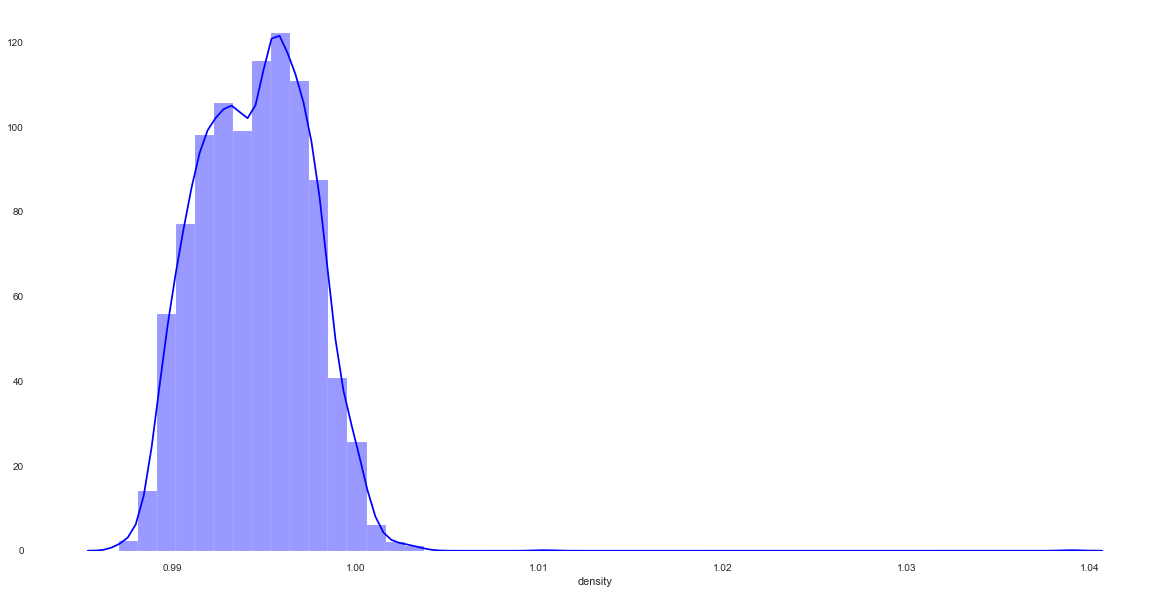

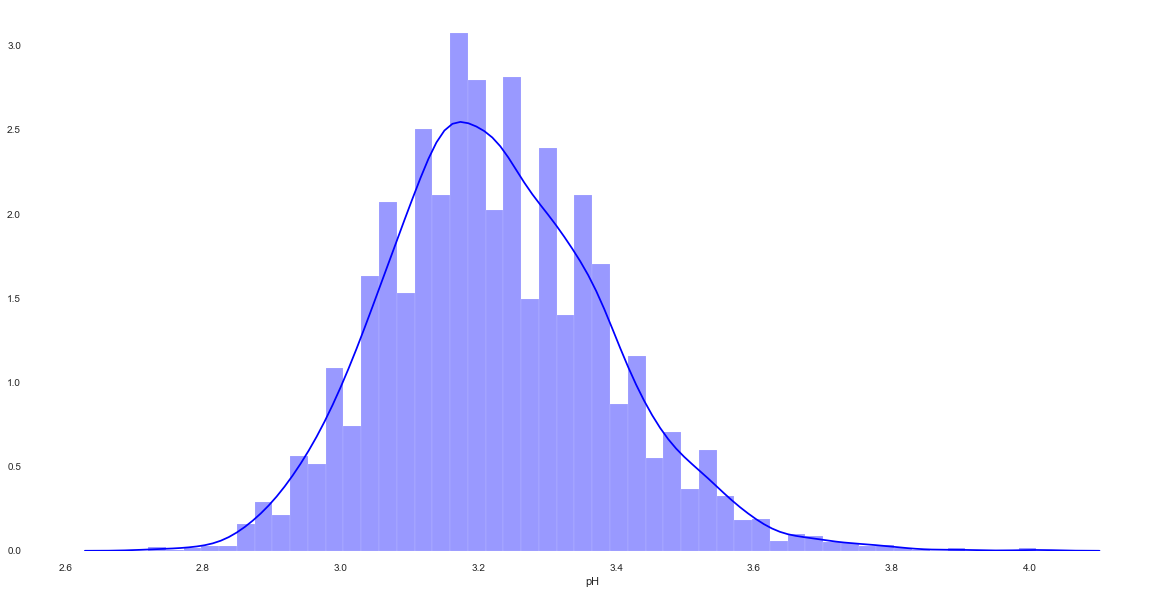

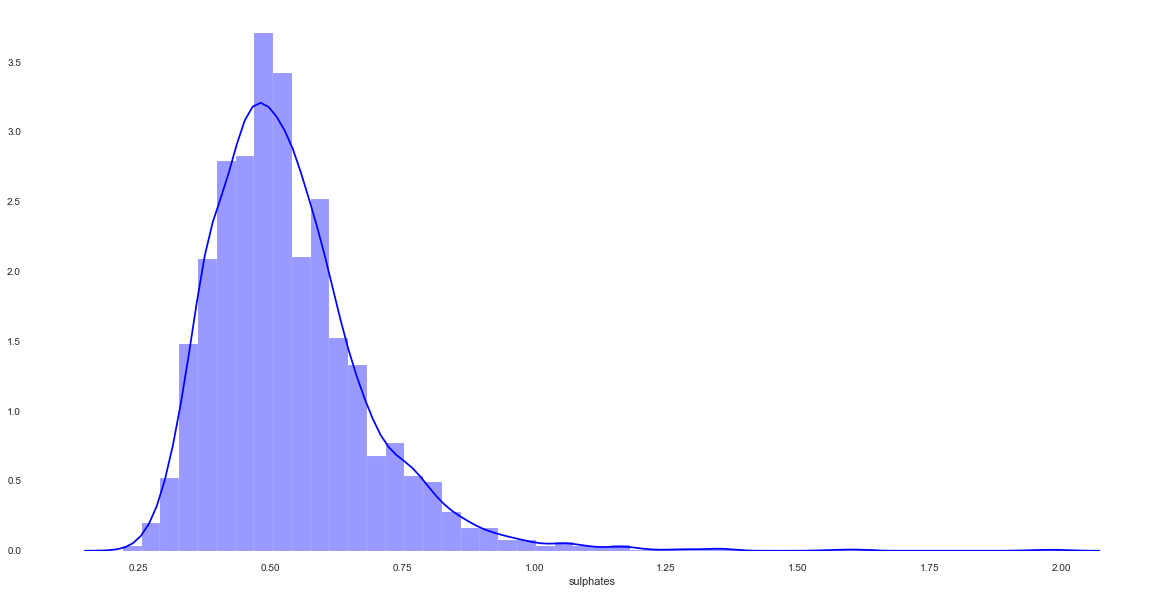

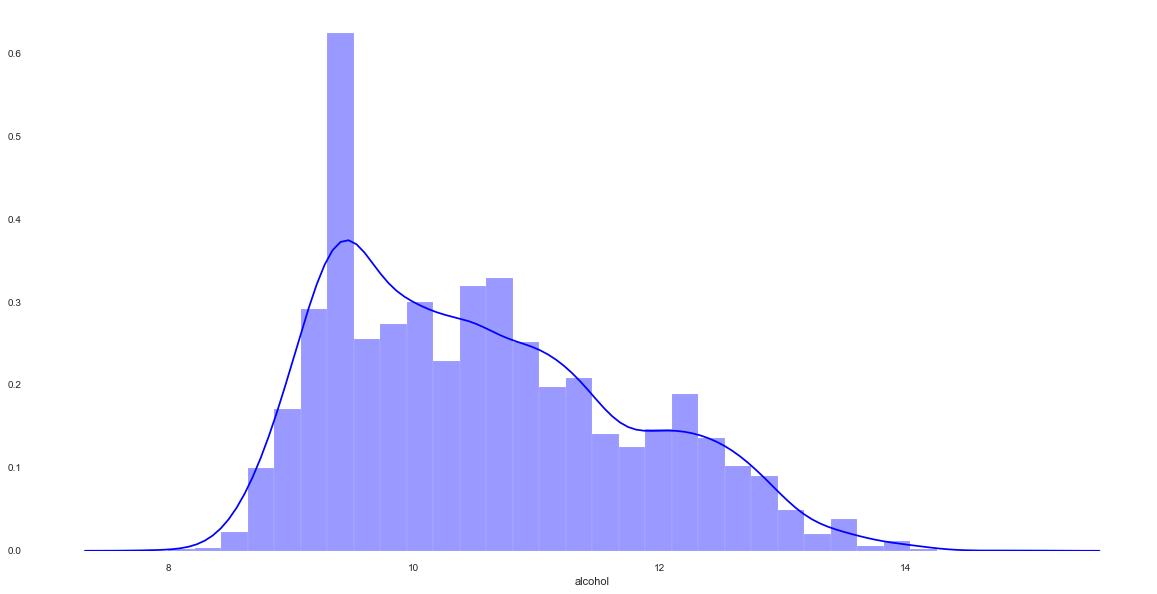

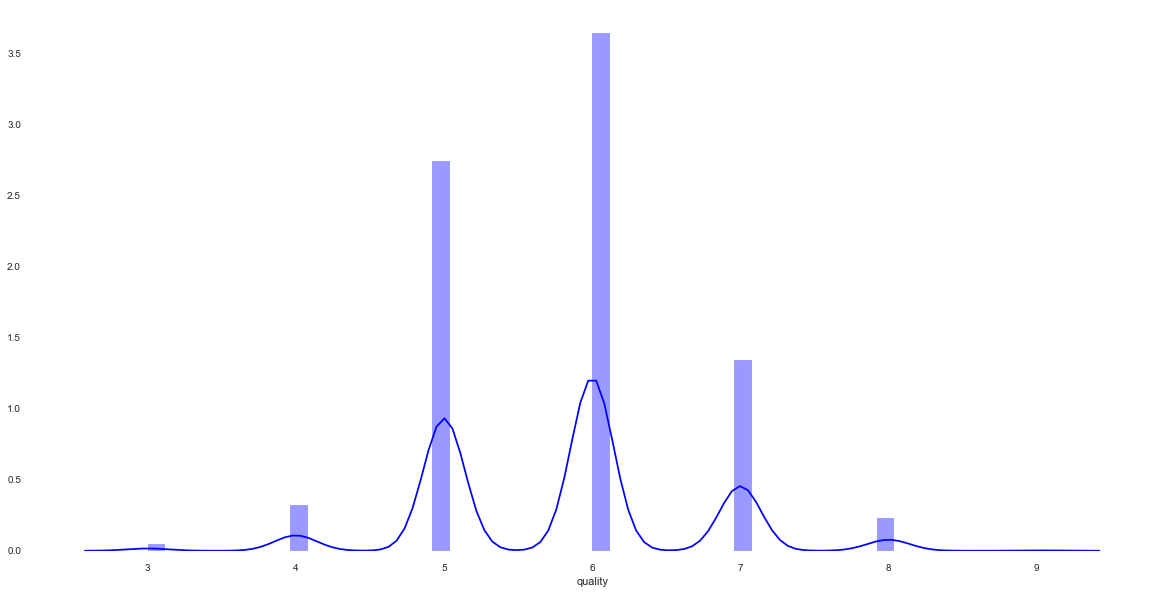

In [24]:
for col in cols:
    plt.figure(figsize=(20,10))
    sns.distplot(df_wine[col], hist=True, kde=True,color='blue', label=None,axlabel=col)
    #plt.xlabel(col,fontdict={'fontsize': 42})
    #plt.title(col,fontdict={'fontsize': 42}) #plotting histograph for each data column using for loop


<a id=section602></a>
### 6.2 Observation from Univariant Analysis

#### From the **univariant** plots we understood the following;
- **Fixed Acidity** is uniformly distributed with little right skew
- **Volatile Acidity** is right Skewed
- **Citric Acid** is almost normally distributed
- **Residual Sugar** is right skewed
- **Chlorides** is right skewed
- **Free Sulphur Dioxide** is right skewed
- **Total Sulphur Dioxide** id right skewed
- **Density** is slightly not uniform
- **pH** is normally distributed.
- **Sulphates** is right skewed
- **Alcohol** is slightly right skewed.
- **Quality** is hybrid curve with a mixture of small normal distributions.


In order to have clarity on the distribution of each ingredient w.r.t other, lets split the columns and plot pairplot as under;
In both cases, we will understand how each ingredients are distributed as compared to the quality of the wine.

<a id=section603></a>
### 6.3 Bivariant Analysis




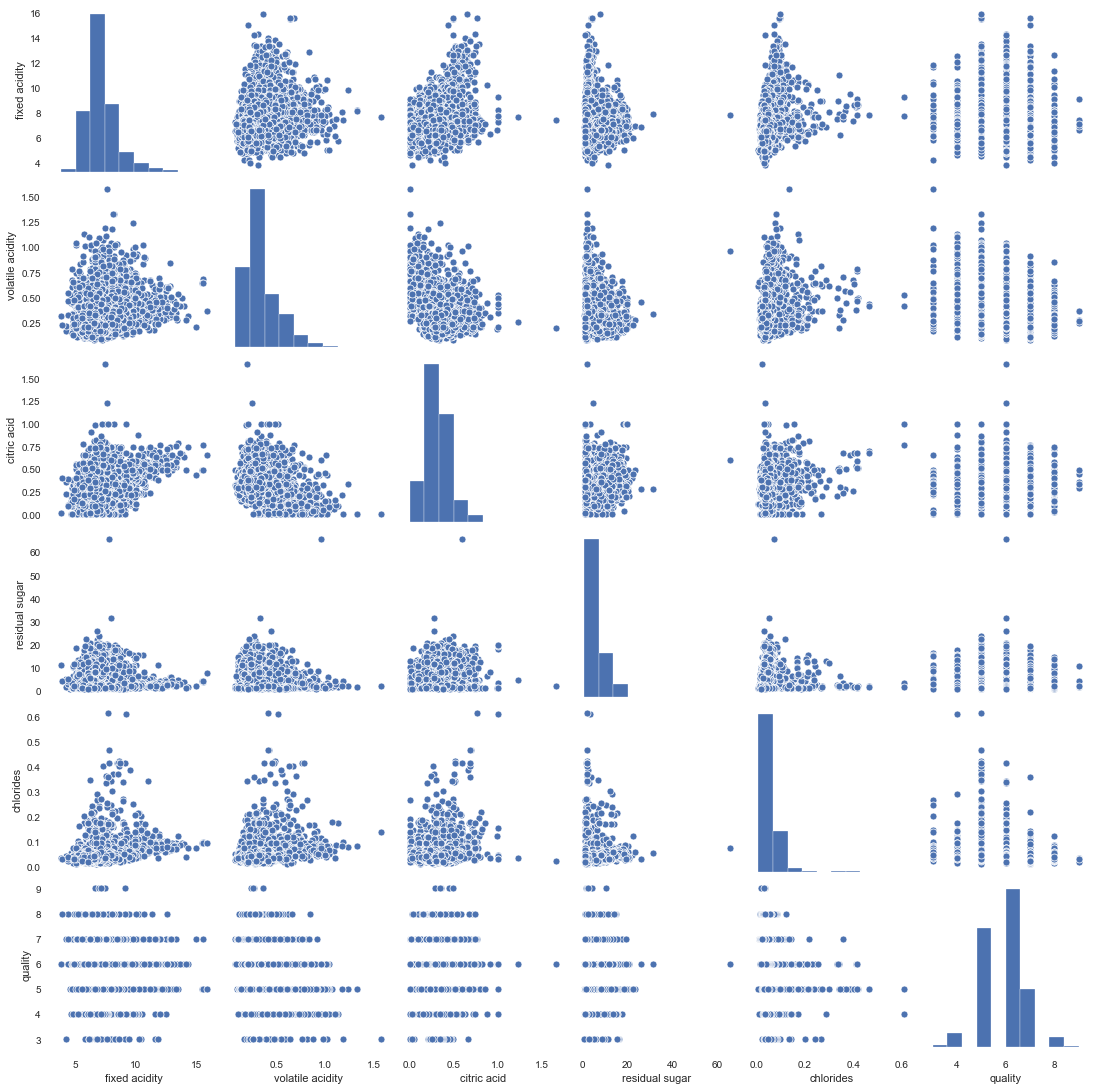

In [26]:
cols1=['fixed acidity','volatile acidity','citric acid','residual sugar'
      ,'chlorides']
cols2=['free sulphur dioxide','total sulphur dioxide','density',#As the columns are too many splitting columns and analyzing them to get more clarity
      'pH','sulphates','alcohol']
df_wine1=df_wine.drop(columns=cols2, axis=1)
sns.pairplot(data=df_wine1)

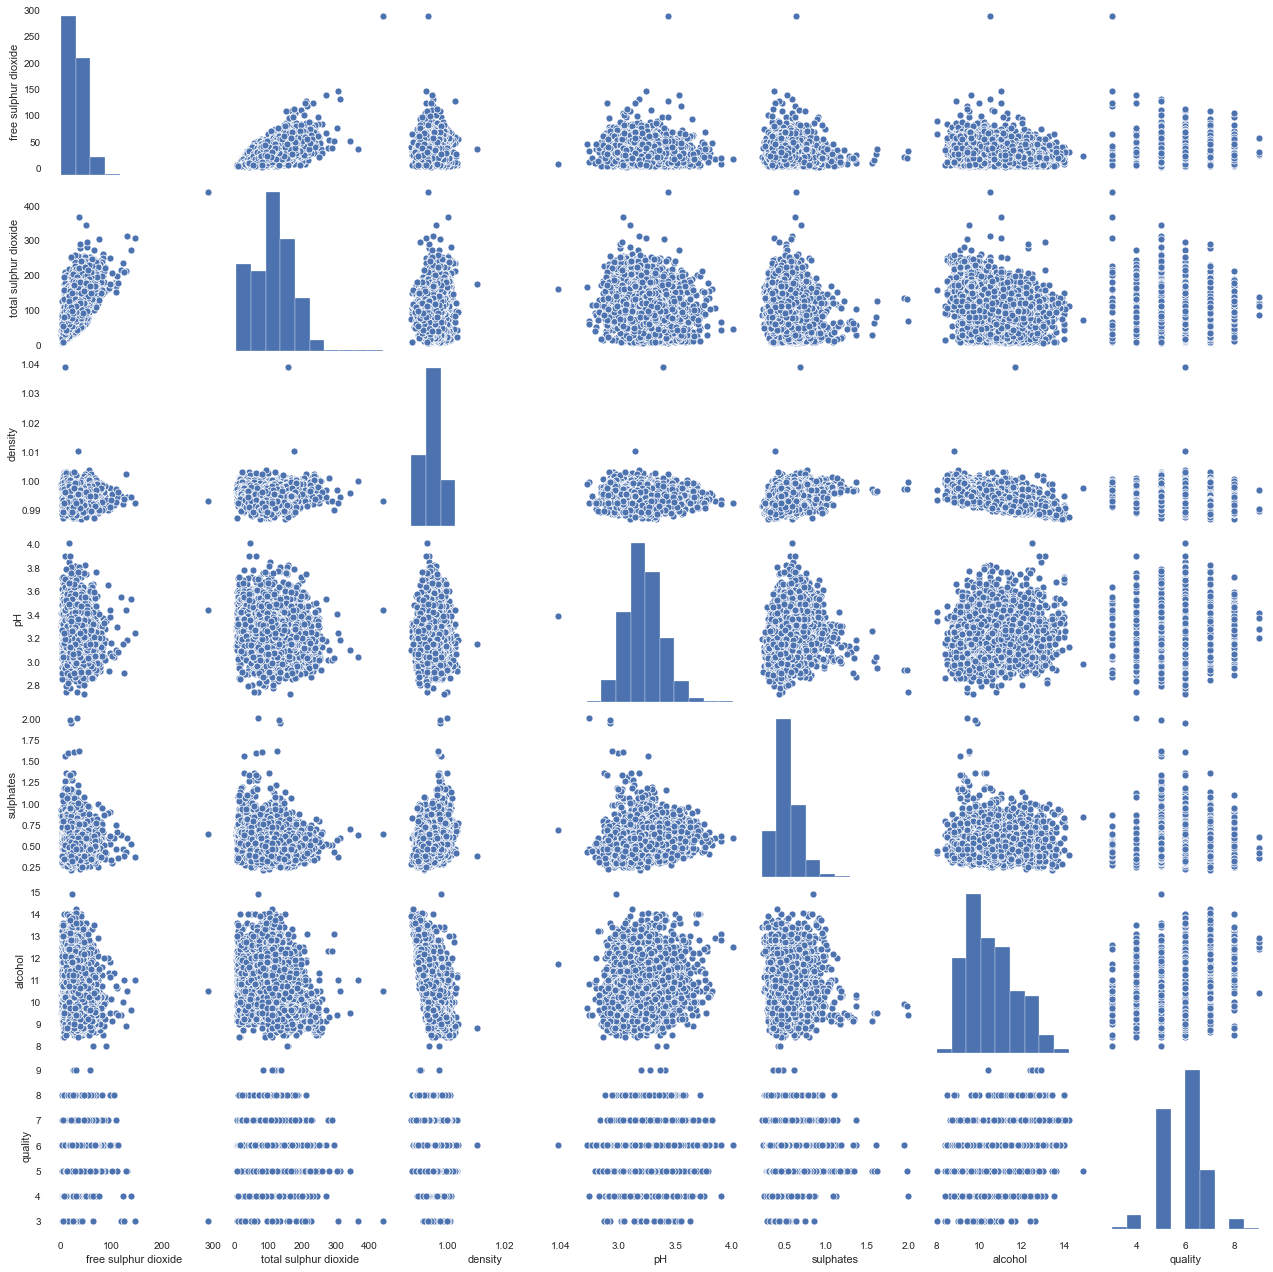

In [27]:
df_wine2=df_wine.drop(columns=cols1, axis=1)
sns.pairplot(data=df_wine2)

From the above scatterplot from pairplot we noticed that for every quality rating between 1=10, how each ingredients are varying in some range. Now let us understand how these the ingredients are co-related with quality through pair plots and heatmaps

<a id=section604></a>
### 6.4 Plotting Heat Map

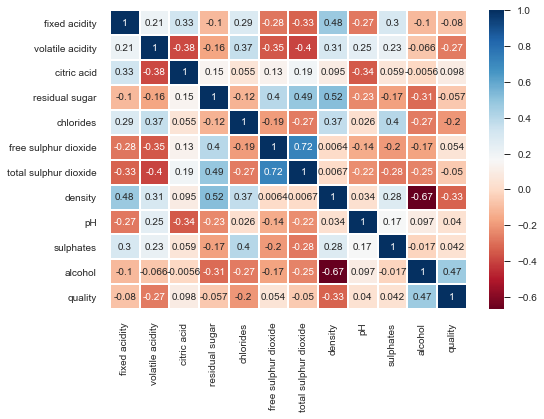

In [28]:
sns.heatmap(data=df_wine.corr(),cmap='RdBu',annot = True,linewidth = 1) #RDBu stands Red and Blue color



### Observations from **heatmap**
- **Alcohol** is the only ingredient that has highest co-relation with **Quality**
- Apart from **Alcohol** there are no ingredients which have high co-relation with **Quality**
- But we noticed lot of ingredients such as **chloride, density, fixed acidity and volatile acidity** have strong negative co-relation with **Quality**.
- We also notice that **Density and Alcohol** have very high negative co-relation
- **Free Sulphur dioxide** has very high positive co-relation with **total Sulphur dioxide**

### Moving forward we will understand how these positive and negative co-relations helps understand the quality of wine

For our analysis, let us consider the wine with quality rating above 7 as best quality wine.

<a id=section605></a>
### 6.5 Quality V/S Alcohol

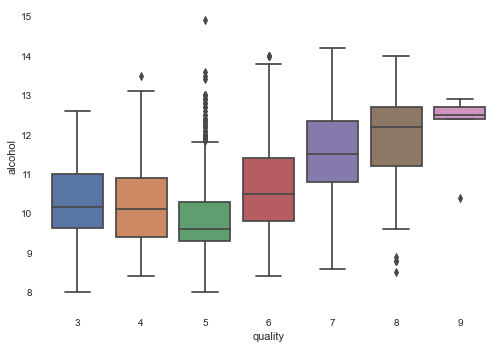

In [29]:
sns.boxplot(x=df_wine['quality'],y=df_wine['alcohol'], data =df_wine)

As you can see from the above box plot, the plot is not very clear as there are outliers. Let us remove the outliers to get clear box plot

In [30]:
df_qal=df_wine.copy()

In [31]:
df_qal.drop(index=df_qal[df_qal['alcohol']>14].index, axis=0, inplace=True)

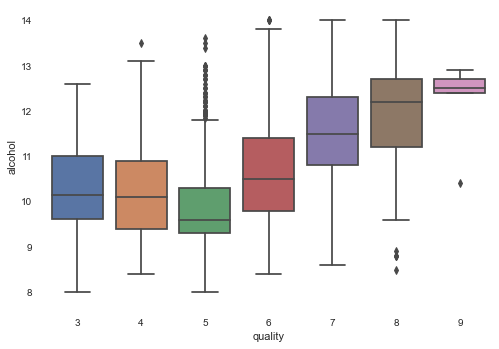

In [32]:
sns.boxplot(x=df_qal['quality'],y=df_qal['alcohol'], data =df_qal)

Now the above boxplot is very clear and we can clearly see the median line of each box

In [33]:
print('median of alcohol of quality value 9 is :',df_wine[df_wine['quality']==9]['alcohol'].median(),'% by volume')
print('median of alcohol of quality value 8 is :',df_wine[df_wine['quality']==8]['alcohol'].median(),'% by volume')
print('median of alcohol of quality value 7 is :',df_wine[df_wine['quality']==7]['alcohol'].median(),'% by volume')

median of alcohol of quality value 9 is : 12.5 % by volume
median of alcohol of quality value 8 is : 12.2 % by volume
median of alcohol of quality value 7 is : 11.5 % by volume


**Inference from box plot**

From the above box plot, we understand that for a good quality wine the alcohol content must be high as possible. 
- The Alcohol content for a wine with quality rating of **9 must be above 12.5% by volume**
- The Alcohol content for a wine with quality rating of **8 must be above 12.2% by volume**
- The Alcohol content for a wine with quality rating of **7 must be above 11.5% by volume**



<a id=section606></a>

### 6.6 Quality v/s Density

Text(0.5, 1.0, 'Quality v/s Density')

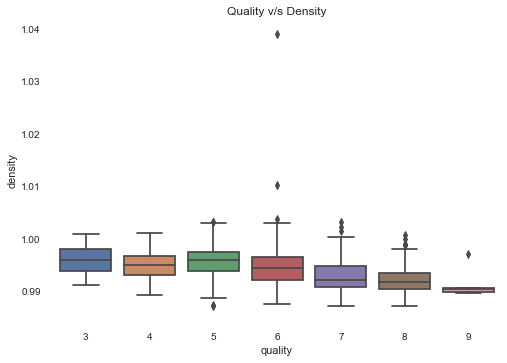

In [34]:
sns.boxplot(x=df_wine['quality'],y=df_wine['density'], data =df_wine)
plt.title('Quality v/s Density')

As you can see from the above box plot, there is an outlier for quality level 6. That is why the plot looks very compressed. Let us remove this outlier and plot again for better view

In [35]:
df_den=df_wine.copy()

In [36]:
#df_den[df_den['density']>1.01] #  we got the indexes as 2753 & 3652
df_den.drop(index=[2753,3652],axis=0,inplace=True)

Text(0.5, 1.0, 'Quality v/s Density')

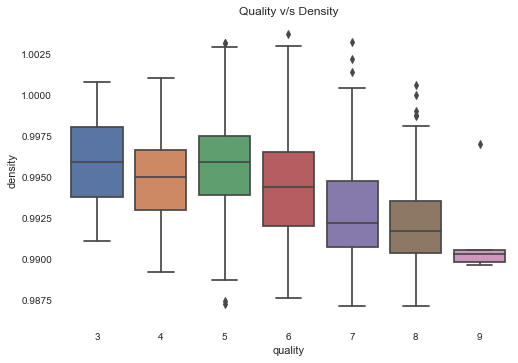

In [37]:
sns.boxplot(x=df_den['quality'],y=df_den['density'], data =df_den)
plt.title('Quality v/s Density')

Now the boxplot is very clear

In [38]:
print('median of density of quality value 9 is :',df_wine[df_wine['quality']==9]['density'].median(),'g/cm3')


median of density of quality value 9 is : 0.9903 g/cm3


In [39]:
df_wine[df_wine['quality']==9]['density'].describe(percentiles=[0.25])

count    5.000000
mean     0.991460
std      0.003118
min      0.989650
25%      0.989800
50%      0.990300
max      0.997000
Name: density, dtype: float64

**Defining density standards for high quality wine**


From the above analysis we can say that for the very best quality 9 rated wine the density value should be in the range of **0.9898-0.9903 g/cm3**

Note: Minimum value of density is ignored as there are outliers in the data

In [40]:
print('wine with quality 8')
print('median=',df_wine[df_wine['quality']==8]['density'].median())
print(df_wine[df_wine['quality']==8]['density'].describe(percentiles=[0.25])) #defining range of values

print('wine with quality 7')
print('median=',df_wine[df_wine['quality']==7]['density'].median())
print(df_wine[df_wine['quality']==7]['density'].describe(percentiles=[0.25]))


wine with quality 8
median= 0.9917
count    148.000000
mean       0.992130
std        0.002484
min        0.987130
25%        0.990350
50%        0.991700
max        1.000600
Name: density, dtype: float64
wine with quality 7
median= 0.99216
count    855.000000
mean       0.992841
std        0.002852
min        0.987110
25%        0.990705
50%        0.992160
max        1.003200
Name: density, dtype: float64


The range of densities for wine with quality rating 8 and 7 are;

**quality level 8 = 0.9903 - 0.9917 g/cm3**

**quality level 7 =0.9907-0.9921 g/cm3**

Text(0.5, 1.0, 'variation of wine density whose quality is less than 4')

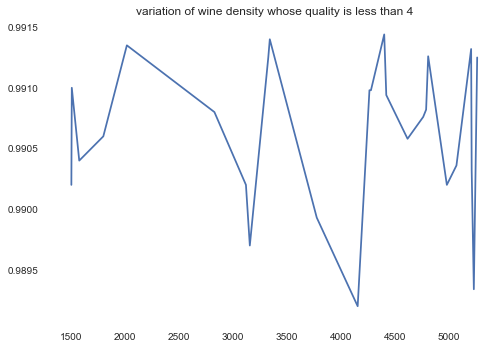

In [41]:
df_wine2=df_wine.copy()
df_wine2[(df_wine2['quality']==4) & (df_wine2['density']<0.9917)]['density'].plot(kind='line')
plt.title('variation of wine density whose quality is less than 4')
#extraction of the density values of wine whose quality is less than 4

**Can we judge wine quality only with density?**

From the above box plot, we understand that for a good quality wine, the density of wine must be low as possible. The density for a wine with quality rating of 9 must be below 0.9903. But this sentence not totally true as some of bad quality wines are also having same density level.

As you know wine making process involves lot of filtration procedures and that is why the density goes down. If the wine has high density, it may also mean that it is not filtered properly. Therefore, we cannot judge the wine quality only with density.

<a id=section607></a>

### 6.7 Quality v/s Chlorides

Text(0.5, 1.0, 'quality v/s chlorides')

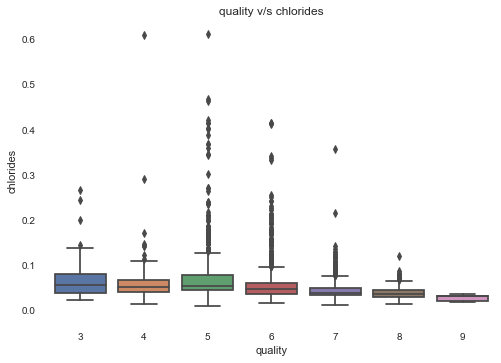

In [42]:
sns.boxplot(x=df_wine['quality'],y=df_wine['chlorides'], data =df_wine)
plt.title('quality v/s chlorides')

As you can see from the above box plot, the plot is not very clear as there are outliers. Let us remove the outliers to get clear box plot

In [43]:
df_clo=df_wine.copy()

In [44]:
df_clo[df_clo['chlorides']>0.15].index

Int64Index([  12,   13,   15,   17,   35,   38,   75,   77,   96,  109,
            ...
            4572, 4721, 4821, 4822, 4853, 4951, 4971, 5145, 5223, 5224],
           dtype='int64', length=118)

There are lot 118 in rows of data and we cannot select and delete them like we did ealrier.

In [45]:
df_clo.drop(index=df_clo[df_clo['chlorides']>0.124].index, axis=0, inplace=True)

Text(0.5, 1.0, 'quality v/s chlorides')

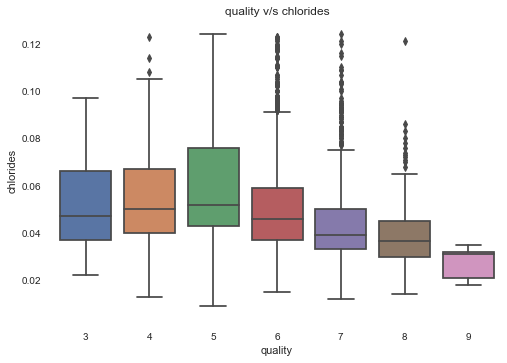

In [46]:
sns.boxplot(x=df_clo['quality'],y=df_clo['chlorides'], data =df_clo)
plt.title('quality v/s chlorides')

Text(0.5, 1.0, 'Chloride levels for wine with quality 9')

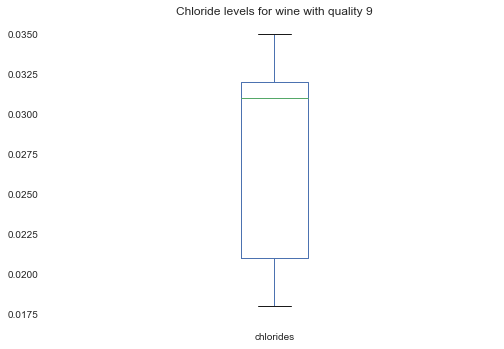

In [47]:
df_wine[(df_wine['quality']==9)]['chlorides'].plot(kind='box')
plt.title('Chloride levels for wine with quality 9') #plotting box plot for quality 9

In [48]:
print('Median of chlorides whose quality rating is 9:',df_wine[df_wine['quality']==9]['chlorides'].median())
print(df_wine[df_wine['quality']==9]['chlorides'].describe()) #defining the range

Median of chlorides whose quality rating is 9: 0.031
count    5.000000
mean     0.027400
std      0.007436
min      0.018000
25%      0.021000
50%      0.031000
75%      0.032000
max      0.035000
Name: chlorides, dtype: float64


In [49]:
print('wine with quality 8')
print('median=',df_wine[df_wine['quality']==8]['chlorides'].median())
print(df_wine[df_wine['quality']==8]['chlorides'].describe(percentiles=[0.25]))
print('wine with quality 7')
print('median=',df_wine[df_wine['quality']==7]['chlorides'].median())
print(df_wine[df_wine['quality']==7]['chlorides'].describe(percentiles=[0.25]))#defining the range

wine with quality 8
median= 0.036500000000000005
count    148.000000
mean       0.040385
std        0.015331
min        0.014000
25%        0.030000
50%        0.036500
max        0.121000
Name: chlorides, dtype: float64
wine with quality 7
median= 0.039
count    855.000000
mean       0.045257
std        0.022861
min        0.012000
25%        0.033000
50%        0.039000
max        0.358000
Name: chlorides, dtype: float64



**Defining Choloride levels**

From the above analysis, we have noticed that for the wine quality of 9 the clorides have very different values compared to the chloride values of other quality wines, the range of chloride values for wine of quality 9 is 0.021 to 0.031
The range of Chlorides for wine with quality rating 8 and 7 are;

**quality level 8 = 0.030-0.036**

**quality level 7 =0.021-0.039**


In general, the chloride values of wine must be as low as possible. else the wine will taste salty.

<a id=section608></a>
### 6.8 Quality v/s Volatile Acidity

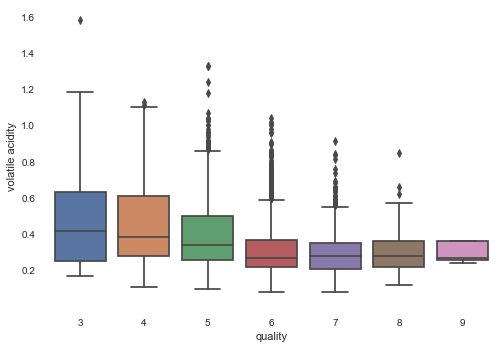

In [50]:
sns.boxplot(x=df_wine['quality'],y=df_wine['volatile acidity'], data =df_wine)

In [51]:
df_vol=df_wine.copy()
df_vol.drop(index=df_vol[df_vol['volatile acidity']>1.2].index, axis=0, inplace=True)

Text(0.5, 1.0, 'quality v/s volatile acidity')

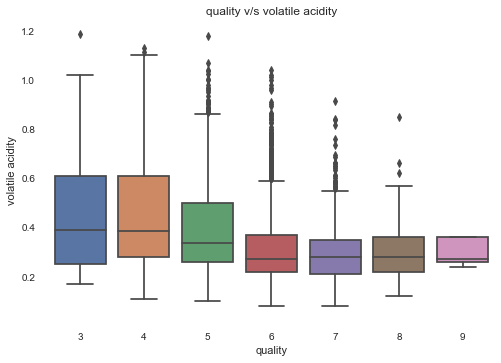

In [52]:
sns.boxplot(x=df_vol['quality'],y=df_vol['volatile acidity'], data =df_vol)
plt.title('quality v/s volatile acidity')

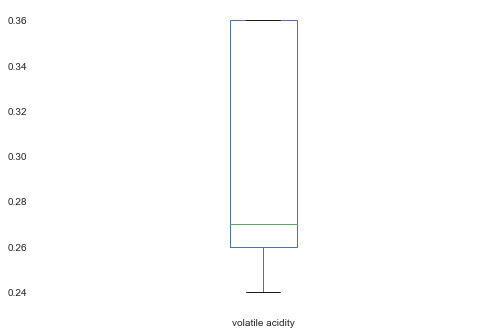

In [53]:
df_wine[(df_wine['quality']==9)]['volatile acidity'].plot(kind='box') #plotting box plot for volatile acidity for high quality wine

In [54]:
print('median for quality rating 9: ',df_wine[df_wine['quality']==9]['volatile acidity'].median())
print(df_wine[df_wine['quality']==9]['volatile acidity'].describe(percentiles=[0.25]))
#defining the ranges

median for quality rating 9:  0.27
count    5.000000
mean     0.298000
std      0.057619
min      0.240000
25%      0.260000
50%      0.270000
max      0.360000
Name: volatile acidity, dtype: float64


In [55]:
print('wine with quality 8')
print('median=',df_wine[df_wine['quality']==8]['volatile acidity'].median())
print(df_wine[df_wine['quality']==8]['volatile acidity'].describe(percentiles=[0.25]))
print('wine with quality 7')
print('median=',df_wine[df_wine['quality']==7]['volatile acidity'].median())
print(df_wine[df_wine['quality']==7]['volatile acidity'].describe(percentiles=[0.25]))#defining the range

wine with quality 8
median= 0.28
count    148.000000
mean       0.302973
std        0.118155
min        0.120000
25%        0.220000
50%        0.280000
max        0.850000
Name: volatile acidity, dtype: float64
wine with quality 7
median= 0.28
count    855.000000
mean       0.292357
std        0.117202
min        0.080000
25%        0.210000
50%        0.280000
max        0.915000
Name: volatile acidity, dtype: float64


**Defining Volatile Acidity levels**


From the above box plot, we see that there is step in median as soon as the quality rating increases from 5 to 6. After that the vales remain almost same.
Hence it is very difficult to deduce, what should be the range of volatile acidity for each good quality rating of the wine (rating above 7). 

From the analysis, the range of Volatile Acidity for wine with quality rating 8 and 7 are;

**quality level 8 = 0.22-0.28**

**quality level 7 =0.21-0.28**


<a id=section609></a>

### 6.9 Density v/s Alcohol 

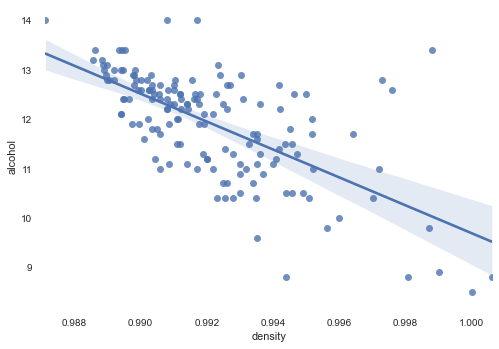

In [56]:
sns.regplot(x=df_wine[df_wine['quality']>7]['density'],y=df_wine[df_wine['quality']>7]['alcohol'], data =df_wine[df_wine['quality']>7]) #hue=df_wine[df_wine['quality']>7]['quality'])

**Observations from the plot**

We can see from the above regplot that as the **Alcohol** percentage increases, the density decreases.
We have already deduced the vales of density and alcohol for each quality levels

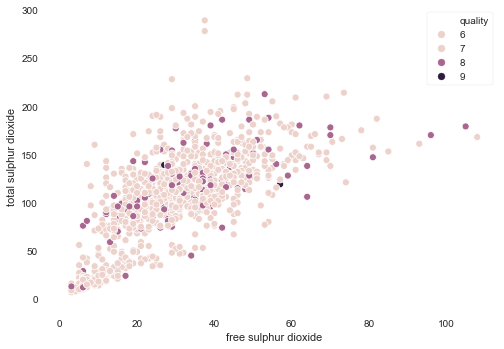

In [58]:
sns.scatterplot(x=df_wine[df_wine['quality']>6]['free sulphur dioxide'],y=df_wine[df_wine['quality']>6]['total sulphur dioxide'], data =df_wine[df_wine['quality']>6],cmap='RdBu' ,hue=df_wine[df_wine['quality']>6]['quality'])
#Multivariant analysis plot 


**Observations from the plot**
from the above regplot between free sulphur di oxide and total sulphur di oxide we see that as free sulphur di oxide increases total sulphur di oxide also increases. But it has no relation with quality of wine.

<a id=section7></a>
# 7. Conclusion / Summary

### From our EDA on wine data we can conclude the following on the ingredients present in the wine data


Out of the 11 different ingredients given in the data we found that alcohol is the only data which is having high positive co-relation with the Quality. The values of alcohol levels for various quality levels of wines are as under;

|Quality Rating||Alochol content level|
|---------------||--------------------|
|9||above 12.5% by volume|
|8||above 12.2% by volume|
|7||above 11.5% by volume|


As we can see from the above table, as the wine quality rating increases, the percentage alcohol content in the wine also increases.





One of the major drawbacks we noticed in the data is that lot of parameters which decides the quality of the data are missing. We have tried our best to show you what other parameters influence the quality of the data in the below points;


1. Year of production of wine
2. grape types (black or white grapes)
3. Wine Brand
4. One of the most important factors determining the quality of wine is **tannin**. Tannin in wine is the presence of phenolic compounds that add bitterness to a wine. Unfortunately, this ingredient was missing in the data

<a id=section8></a>
# 8 Actionable Insights



When we deep dived into the data, we noticed that there were three ingredients, **Density, Chlorides and Volatile Acidity** are the three factors which are negatively co-related. 
the range of values are as under;

|Quality Rating||Alcohol content||Chlorides||Density||Volatile Acidity|
|--||----------------||---------||---------||---------|
|Na||(% by Volume)||(g / dm^3)||(g / dm^3)||(acetic acid - g / dm^3)|
|9||above 12.5% ||0.021-0.031||0.9898-0.9903||0.26-0.27|
|8||above 12.2% ||0.030-0.036||0.9903-9917||0.22-0.28|
|7||above 11.5% ||0.033-0.039||0.9907-0.9921||0.21-0.28|


As alcohol level increase ==> Quality increases
as chlorides level decreases ==> Quality increases
As density decreases ==> Quality increases
As the volatile acidity decreases ==> Quality increases

But since, only below four contributes towards wine quality:
**alcohol, density, volatile acidity, chlorides**
Increase in the alcohol qty, increases the quality of the wine.
Decrease in the density of the wine, increases the quality of the wine.
Decrease in the volatile acidity of the wine, increases the quality of the wine.
Decrease in chlorides, increases the quality of the wine.

To be frank, measuring these 4 ingredients precisely is one thing but achieving it in the process in totally different. Therefore, the best way to test these values is to conduct trials, understand if the process can be controlled and analyse the results for repeatability.
